<a href="https://colab.research.google.com/github/Prasanna350/AppointmentsApp/blob/main/HandWrittenDigitprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hand Written Digit prediction**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt


 **Import Library**

In [4]:
from sklearn.datasets import load_digits

In [6]:
df = load_digits()

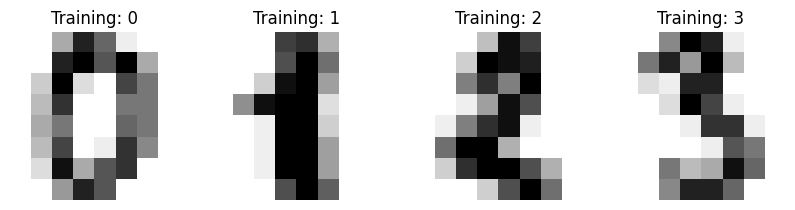

In [8]:
_, axes = plt.subplots(nrows=1,ncols=4,figsize = (10,3))
for ax,image,label in zip(axes,df.images,df.target):
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r,interpolation = "nearest")
  ax.set_title("Training: %i" % label)

**Data Preprocessing**

In [9]:
df.images.shape

(1797, 8, 8)

In [10]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [11]:
df.images[0].shape

(8, 8)

In [12]:
len(df.images)

1797

In [13]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [14]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [15]:
data[0].shape

(64,)

In [16]:
data.shape

(1797, 64)

In [18]:
data.min()

0.0

In [19]:
data.max()

16.0

In [21]:
data =data/16

In [22]:
data.min()

0.0

In [23]:
data.max()

0.0625

In [24]:
data[0]

array([0.        , 0.        , 0.01953125, 0.05078125, 0.03515625,
       0.00390625, 0.        , 0.        , 0.        , 0.        ,
       0.05078125, 0.05859375, 0.0390625 , 0.05859375, 0.01953125,
       0.        , 0.        , 0.01171875, 0.05859375, 0.0078125 ,
       0.        , 0.04296875, 0.03125   , 0.        , 0.        ,
       0.015625  , 0.046875  , 0.        , 0.        , 0.03125   ,
       0.03125   , 0.        , 0.        , 0.01953125, 0.03125   ,
       0.        , 0.        , 0.03515625, 0.03125   , 0.        ,
       0.        , 0.015625  , 0.04296875, 0.        , 0.00390625,
       0.046875  , 0.02734375, 0.        , 0.        , 0.0078125 ,
       0.0546875 , 0.01953125, 0.0390625 , 0.046875  , 0.        ,
       0.        , 0.        , 0.        , 0.0234375 , 0.05078125,
       0.0390625 , 0.        , 0.        , 0.        ])

**Train Test Split Data**

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(data,df.target,test_size = 0.3)

In [27]:
X_train.shape,X_test.shape,y_train,y_test.shape

((1257, 64), (540, 64), array([6, 1, 5, ..., 7, 5, 3]), (540,))

**Random Forest Model**

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf = RandomForestClassifier()

In [30]:
rf.fit(X_train,y_train)

RandomForestClassifier()

**Predict Test Data**

In [31]:
y_pred = rf.predict(X_test)

In [32]:
y_pred

array([1, 3, 1, 0, 0, 3, 7, 0, 5, 9, 8, 7, 0, 2, 3, 4, 1, 9, 8, 1, 9, 7,
       5, 6, 5, 5, 1, 2, 8, 2, 6, 4, 6, 1, 2, 1, 7, 5, 6, 3, 2, 8, 6, 3,
       3, 7, 1, 4, 7, 9, 3, 9, 5, 1, 1, 4, 6, 9, 8, 2, 4, 5, 3, 5, 3, 4,
       0, 0, 5, 7, 6, 1, 5, 4, 7, 8, 0, 7, 5, 8, 9, 3, 3, 0, 0, 5, 4, 6,
       5, 0, 1, 7, 6, 5, 2, 7, 3, 2, 8, 6, 6, 3, 2, 7, 7, 5, 3, 7, 1, 0,
       4, 6, 0, 2, 3, 2, 6, 3, 6, 3, 5, 7, 0, 4, 9, 9, 6, 7, 6, 7, 0, 9,
       9, 6, 6, 9, 1, 4, 0, 2, 0, 5, 2, 7, 1, 4, 9, 5, 4, 1, 4, 4, 5, 1,
       2, 8, 5, 1, 3, 9, 5, 5, 7, 2, 1, 5, 2, 2, 5, 0, 7, 8, 3, 4, 2, 2,
       5, 2, 1, 2, 7, 3, 9, 7, 0, 0, 9, 6, 8, 4, 3, 1, 3, 3, 9, 0, 3, 7,
       2, 0, 4, 7, 9, 8, 9, 2, 3, 0, 5, 7, 7, 5, 3, 0, 6, 1, 2, 3, 2, 7,
       4, 3, 5, 1, 4, 7, 1, 1, 3, 9, 4, 5, 5, 5, 9, 3, 1, 5, 3, 8, 3, 3,
       5, 7, 1, 9, 5, 8, 4, 0, 6, 3, 6, 4, 7, 9, 1, 2, 5, 6, 4, 0, 7, 1,
       0, 6, 0, 7, 6, 9, 9, 5, 9, 4, 9, 2, 6, 7, 6, 7, 8, 9, 4, 4, 7, 3,
       3, 0, 2, 3, 6, 1, 1, 3, 7, 0, 0, 2, 9, 7, 3,

**Model Accuracy**

In [33]:
from sklearn.metrics import confusion_matrix,classification_report

In [34]:
confusion_matrix(y_test,y_pred)

array([[55,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 54,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 48,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 57,  0,  1,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 52,  0,  0,  2,  0,  1],
       [ 0,  0,  0,  0,  1, 46,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 63,  0,  0],
       [ 0,  2,  2,  0,  0,  1,  0,  1, 35,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  2, 57]])

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        57
           1       0.96      0.98      0.97        55
           2       0.96      1.00      0.98        48
           3       1.00      0.95      0.97        60
           4       0.95      0.95      0.95        55
           5       0.90      0.94      0.92        49
           6       1.00      1.00      1.00        51
           7       0.94      1.00      0.97        63
           8       0.92      0.85      0.89        41
           9       0.95      0.93      0.94        61

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540

